<a href="https://colab.research.google.com/github/shanicefrederickeze/femme-finance/blob/main/Econometrics_%26_Forecasting_Final_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and Basic Checks


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import plotly.express as px

In [ ]:
# This function reads a CSV file and tries to automatically convert columns
# that look like numbers (e.g. "1000", "45.5") into proper numeric types (int or float).
# It helps clean the data so numeric values don't stay as strings by mistake.
# Columns that can't be converted are left as they are.

def read_and_convert_csv(filepath):
    df = pd.read_csv(filepath)

    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                # Attempt conversion to numeric
                numeric_col = pd.to_numeric(df[col], errors='coerce')

                # Proceed if most values convert successfully
                if numeric_col.notna().mean() > 0.8:
                    if (numeric_col.dropna() % 1 == 0).all():
                        df[col] = numeric_col.astype('Int64')  # Safe integer type
                    else:
                        df[col] = numeric_col.astype(float)
            except:
                pass  # Leave column unchanged if conversion fails

    return df

In [ ]:
FinancialLiteracyNational = read_and_convert_csv('/content/Econometrics & Forecasting - Andreea.csv')

In [ ]:
print(FinancialLiteracyNational)

     age gender Irish region   income  financial literacy risk aversion  \
0     19      M     Drogheda  3936.88                   9   risk loving   
1     19      M        Sligo  2162.10                   9  risk neutral   
2     25      M    Waterford  4380.18                   6   risk averse   
3     20      F        Sligo  2642.94                   2   risk averse   
4     19      F    Waterford  2635.13                   4  risk neutral   
..   ...    ...          ...      ...                 ...           ...   
295   22      F        Derry  4324.63                   1  risk neutral   
296   20      M       Galway  2365.74                   2  risk neutral   
297   21      F        Sligo   923.09                   1  risk neutral   
298   21      F    Waterford  4037.02                   7  risk neutral   
299   22      F     Limerick  4762.41                   1   risk loving   

    do you invest what sector(s) would you invest in  
0             yes                         he

In [ ]:
# Shows the number of missing values per column
FinancialLiteracyNational.isnull().sum()

,0
age,0
gender,0
Irish region,0
income,0
financial literacy,0
risk aversion,0
do you invest,0
what sector(s) would you invest in,0


In [ ]:
FinancialLiteracyNational.duplicated().any()

np.False_

In [ ]:
TECH = read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (TECH).csv')

In [ ]:
print(TECH)

                             Company Name Symbol        Date  Open Price  \
0                            Broadcom Inc   AVGO  16/01/2015         373   
1                             Oracle Corp   ORCL  21/01/2015         257   
2                            Broadcom Inc   AVGO  30/01/2015         330   
3                                   Apple   AAPL  30/01/2015         352   
4    International Business Machines Corp    IBM  01/02/2015         147   
..                                    ...    ...         ...         ...   
995                           NVIDIA Corp   NVDA  03/12/2024         208   
996                             Adobe Inc   ADBE  13/12/2024         299   
997  International Business Machines Corp    IBM  16/12/2024         134   
998  International Business Machines Corp    IBM  24/12/2024         159   
999                           NVIDIA Corp   NVDA  31/12/2024         102   

     Close Price  High Price  Low Price   Volume  
0            275         169        

In [ ]:
# Shows the number of missing values per column
TECH.isnull().sum()

,0
Company Name,0
Symbol,0
Date,0
Open Price,0
Close Price,0
High Price,0
Low Price,0
Volume,0


In [ ]:
TECH.duplicated().any()

np.False_

In [ ]:
HEALTHCARE = read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (HEALTHCARE).csv')

In [ ]:
print(HEALTHCARE)

                      Company Name Symbol        Date  Open Price  \
0                Johnson & Johnson    JNJ  09/01/2015         214   
1    Boston Scientific Corporation    BSX  21/01/2015         161   
2            Eli Lilly and Company    LLY  25/01/2015         245   
3    Boston Scientific Corporation    BSX  27/01/2015         391   
4    Boston Scientific Corporation    BSX  05/02/2015         149   
..                             ...    ...         ...         ...   
995          Eli Lilly and Company    LLY  17/12/2024         227   
996                     Merck & Co    MRK  20/12/2024         204   
997                     Merck & Co    MRK  22/12/2024         166   
998   Bristol-Myers Squibb Company    BMY  25/12/2024         384   
999                     Merck & Co    MRK  26/12/2024         319   

     Close Price  High Price  Low Price   Volume  
0            467         335        259  3956869  
1            317         265         88  2806744  
2            469  

In [ ]:
# Shows the number of missing values per column
HEALTHCARE.isnull().sum()

,0
Company Name,0
Symbol,0
Date,0
Open Price,0
Close Price,0
High Price,0
Low Price,0
Volume,0


In [ ]:
HEALTHCARE.duplicated().any()

np.False_

In [ ]:
HEALTHCARE.isnull().sum()

,0
Company Name,0
Symbol,0
Date,0
Open Price,0
Close Price,0
High Price,0
Low Price,0
Volume,0


In [ ]:
FINANCE = read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (FINANCE).csv')

In [ ]:
print(FINANCE)

                Company Name Symbol        Date  Open Price  Close Price  \
0               KKR & Co Inc    KKR  02/01/2015         497          354   
1        American Express Co    AXP  05/01/2015         288           73   
2        JPMorgan Chase & Co    JPM  07/01/2015         343          173   
3             Morgan Stanley     MS  20/01/2015          73          380   
4    Goldman Sachs Group Inc     GS  20/01/2015         310          338   
..                       ...    ...         ...         ...          ...   
995      JPMorgan Chase & Co    JPM  04/12/2024         312          425   
996           Morgan Stanley     MS  07/12/2024         493          261   
997         Wells Fargo & Co    WFC  08/12/2024         379          345   
998           Morgan Stanley     MS  12/12/2024         492          415   
999     Bank of America Corp    BAC  12/12/2024         463          264   

     High Price  Low Price   Volume  
0           135        465  5239751  
1          

In [ ]:
# Shows the number of missing values per column
FINANCE.isnull().sum()

,0
Company Name,0
Symbol,0
Date,0
Open Price,0
Close Price,0
High Price,0
Low Price,0
Volume,0


In [ ]:
FINANCE.duplicated().any()

np.False_

In [ ]:
FINANCE.isnull().sum()

,0
Company Name,0
Symbol,0
Date,0
Open Price,0
Close Price,0
High Price,0
Low Price,0
Volume,0


In [ ]:
CONSUMERDISCRETIONARY = read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (CONSUMER DISCRETIONARY).csv')

In [ ]:
print(CONSUMERDISCRETIONARY)

              Company Name Symbol        Date  Open Price  Close Price  \
0                   Amazon   AMZN  02/01/2015         227          424   
1                     Visa      V  07/01/2015         427          367   
2    Uber Technologies Inc   UBER  09/01/2015         130          374   
3    Uber Technologies Inc   UBER  18/01/2015         212          243   
4                   CostCo   COST  28/01/2015         386          491   
..                     ...    ...         ...         ...          ...   
995         Walt Disney Co    DIS  28/11/2024         424          108   
996                 Amazon   AMZN  17/12/2024         246          108   
997                 CostCo   COST  17/12/2024         108          195   
998                 CostCo   COST  19/12/2024         279          282   
999                   Visa      V  30/12/2024         363          132   

     High Price  Low Price   Volume  
0           204        500  9977307  
1           492        133  3642710

In [ ]:
# Shows the number of missing values per column
CONSUMERDISCRETIONARY.isnull().sum()

,0
Company Name,0
Symbol,0
Date,0
Open Price,0
Close Price,0
High Price,0
Low Price,0
Volume,0


In [ ]:
CONSUMERDISCRETIONARY.duplicated().any()

np.False_

In [ ]:
CONSUMERDISCRETIONARY.head(5)

#data check

,Company Name,Symbol,Date,Open Price,Close Price,High Price,Low Price,Volume
0,Amazon,AMZN,02/01/2015,227,424,204,500,9977307
1,Visa,V,07/01/2015,427,367,492,133,3642710
2,Uber Technologies Inc,UBER,09/01/2015,130,374,463,327,8858033
3,Uber Technologies Inc,UBER,18/01/2015,212,243,263,403,5415272
4,CostCo,COST,28/01/2015,386,491,126,461,7857395


In [ ]:
COMMUNICATIONS = read_and_convert_csv('/content/Econometrics & Forecasting - Ayaka Communication.csv')

In [ ]:
print(COMMUNICATIONS)

        Company        Date  Open Price  High Price  Low Price  Close Price  \
0      Vodafone  2007-03-09   51.252365   55.473148  50.890587    51.674442   
1      Vodafone  2007-03-12   52.578899   54.237064  51.795036    52.850235   
2      Vodafone  2007-03-13   53.061272   54.990772  51.945782    54.267212   
3      Vodafone  2007-03-14   52.458305   54.749584  52.186970    52.910530   
4      Vodafone  2007-03-15   53.212013   56.799683  53.212013    55.201813   
...         ...         ...         ...         ...        ...          ...   
18944      SNAP  2022-05-16   24.290001   24.700001  23.340000    23.420000   
18945      SNAP  2022-05-17   24.084999   24.705000  23.330000    24.540001   
18946      SNAP  2022-05-18   24.049999   24.754000  22.645000    22.730000   
18947      SNAP  2022-05-19   22.730000   23.740000  22.280001    23.200001   
18948      SNAP  2022-05-20   23.590000   24.155001  22.295000    23.260000   

        Adjclose       Volume  
0      50.875355  2

In [ ]:
COMMUNICATIONS.head(5)
#data check

,Company,Date,Open Price,High Price,Low Price,Close Price,Adjclose,Volume
0,Vodafone,2007-03-09,51.252365,55.473148,50.890587,51.674442,50.875355,290137891.0
1,Vodafone,2007-03-12,52.578899,54.237064,51.795036,52.850235,52.032967,38738166.0
2,Vodafone,2007-03-13,53.061272,54.990772,51.945782,54.267212,53.428032,46376399.0
3,Vodafone,2007-03-14,52.458305,54.749584,52.186970,52.910530,52.092331,30761009.0
4,Vodafone,2007-03-15,53.212013,56.799683,53.212013,55.201813,54.348179,56159369.0


In [ ]:
# Shows the number of missing values per column
COMMUNICATIONS.isnull().sum()

,0
Company,0
Date,0
Open Price,7
High Price,7
Low Price,7
Close Price,7
Adjclose,7
Volume,7


In [ ]:
COMMUNICATIONS.duplicated().any()

np.False_

In [ ]:
AI = read_and_convert_csv('/content/Econometrics & Forecasting - Ayaka AI.csv')

In [ ]:
print(AI)

      Symbol        Date  Open Price  High Price   Low Price  Close Price  \
0       NVDA  1999-01-22    0.043750    0.048828    0.038802     0.041016   
1       NVDA  1999-01-25    0.044271    0.045833    0.041016     0.045313   
2       NVDA  1999-01-26    0.045833    0.046745    0.041146     0.041797   
3       NVDA  1999-01-27    0.041927    0.042969    0.039583     0.041667   
4       NVDA  1999-01-28    0.041667    0.041927    0.041276     0.041536   
...      ...         ...         ...         ...         ...          ...   
41078   GOOG  2024-04-24  159.089996  161.389999  158.820007   161.100006   
41079   GOOG  2024-04-25  153.360001  158.279999  152.768005   157.949997   
41080   GOOG  2024-04-26  175.990005  176.419998  171.399994   173.690002   
41081   GOOG  2024-04-29  170.770004  171.380005  167.059998   167.899994   
41082   GOOG  2024-04-30  167.380005  169.869995  164.500000   164.639999   

             Volume      Adjusted  
0      2.714688e+09  3.762098e-02  
1  

In [ ]:
# Shows the number of missing values per column
AI.isnull().sum()

,0
Symbol,0
Date,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
Volume,0
Adjusted,0


In [ ]:
AI.duplicated().any()

np.False_

## Standardising Data Format/Cleaning



In [ ]:
#  Rename columns consistently
COMMUNICATIONS.rename(columns={
        'symbol': 'Symbol',
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume',
        'adjusted': 'Adjusted Close'
    }, inplace=True)

In [ ]:
AI.rename(columns={
        'symbol': 'Symbol',
        'date': 'Date',
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'volume': 'Volume',
        'adjusted': 'Adjusted Close'
    }, inplace=True)

In [ ]:
FinancialLiteracyNational.rename(columns={
        'age': 'Age',
        'gender': 'Gender',
        'Irish region': 'Irish Region',
        'income': 'Income',
        'financial literacy': 'Financial Literacy',
        'risk aversion': 'Risk Aversion',
        'do you invest': 'Do You Invest?',
        'what sector(s) would you invest in':'What Sector(s) Would You Invest In?',
    }, inplace=True)

In [ ]:
print(FinancialLiteracyNational)

     Age Gender Irish Region   Income  Financial Literacy Risk Aversion  \
0     19      M     Drogheda  3936.88                   9   risk loving   
1     19      M        Sligo  2162.10                   9  risk neutral   
2     25      M    Waterford  4380.18                   6   risk averse   
3     20      F        Sligo  2642.94                   2   risk averse   
4     19      F    Waterford  2635.13                   4  risk neutral   
..   ...    ...          ...      ...                 ...           ...   
295   22      F        Derry  4324.63                   1  risk neutral   
296   20      M       Galway  2365.74                   2  risk neutral   
297   21      F        Sligo   923.09                   1  risk neutral   
298   21      F    Waterford  4037.02                   7  risk neutral   
299   22      F     Limerick  4762.41                   1   risk loving   

    Do You Invest? What Sector(s) Would You Invest In?  
0              yes                        

In [ ]:
FinancialLiteracyNational[50:100]

,Age,Gender,Irish Region,Income,Financial Literacy,Risk Aversion,Do You Invest?,What Sector(s) Would You Invest In?
50,25,F,Cork,1439.58,3,risk loving,no,retail
51,20,F,Drogheda,3044.48,2,risk averse,yes,healthcare
52,23,M,Derry,3290.75,7,risk loving,no,tech
53,24,M,Waterford,4198.31,6,risk loving,yes,retail
54,23,M,Kilkenny,2725.80,10,risk neutral,no,tech
55,18,F,Galway,2422.33,1,risk loving,yes,tech
56,18,M,Waterford,1823.79,5,risk neutral,no,communications
57,22,F,Wexford,1239.83,2,risk averse,yes,consumer goods
58,21,F,Galway,2566.10,2,risk averse,no,consumer goods
59,22,M,Waterford,2872.15,8,risk averse,no,consumer goods


In [ ]:
FinancialLiteracyNational["Do You Invest?"] = FinancialLiteracyNational["Do You Invest?"].replace("no", "No")
#standardising data

In [ ]:
FinancialLiteracyNational["Do You Invest?"] = FinancialLiteracyNational["Do You Invest?"].replace("yes", "Yes")

In [ ]:
FinancialLiteracyNational["Risk Aversion"] = FinancialLiteracyNational["Risk Aversion"].replace("risk neutral", "Risk Neutral")

In [ ]:
FinancialLiteracyNational["Risk Aversion"] = FinancialLiteracyNational["Risk Aversion"].replace("risk averse", "Risk Averse")

In [ ]:
FinancialLiteracyNational["Risk Aversion"] = FinancialLiteracyNational["Risk Aversion"].replace("risk loving", "Risk Loving")

In [ ]:
print(AI)

      Symbol        Date  Open Price  High Price   Low Price  Close Price  \
0       NVDA  1999-01-22    0.043750    0.048828    0.038802     0.041016   
1       NVDA  1999-01-25    0.044271    0.045833    0.041016     0.045313   
2       NVDA  1999-01-26    0.045833    0.046745    0.041146     0.041797   
3       NVDA  1999-01-27    0.041927    0.042969    0.039583     0.041667   
4       NVDA  1999-01-28    0.041667    0.041927    0.041276     0.041536   
...      ...         ...         ...         ...         ...          ...   
41078   GOOG  2024-04-24  159.089996  161.389999  158.820007   161.100006   
41079   GOOG  2024-04-25  153.360001  158.279999  152.768005   157.949997   
41080   GOOG  2024-04-26  175.990005  176.419998  171.399994   173.690002   
41081   GOOG  2024-04-29  170.770004  171.380005  167.059998   167.899994   
41082   GOOG  2024-04-30  167.380005  169.869995  164.500000   164.639999   

             Volume      Adjusted  
0      2.714688e+09  3.762098e-02  
1  

In [ ]:
print(COMMUNICATIONS)

        Company        Date  Open Price  High Price  Low Price  Close Price  \
0      Vodafone  2007-03-09   51.252365   55.473148  50.890587    51.674442   
1      Vodafone  2007-03-12   52.578899   54.237064  51.795036    52.850235   
2      Vodafone  2007-03-13   53.061272   54.990772  51.945782    54.267212   
3      Vodafone  2007-03-14   52.458305   54.749584  52.186970    52.910530   
4      Vodafone  2007-03-15   53.212013   56.799683  53.212013    55.201813   
...         ...         ...         ...         ...        ...          ...   
18944      SNAP  2022-05-16   24.290001   24.700001  23.340000    23.420000   
18945      SNAP  2022-05-17   24.084999   24.705000  23.330000    24.540001   
18946      SNAP  2022-05-18   24.049999   24.754000  22.645000    22.730000   
18947      SNAP  2022-05-19   22.730000   23.740000  22.280001    23.200001   
18948      SNAP  2022-05-20   23.590000   24.155001  22.295000    23.260000   

        Adjclose       Volume  
0      50.875355  2

In [ ]:
Communications= COMMUNICATIONS.dropna()

In [ ]:
Communications.isnull().sum()

,0
Company,0
Date,0
Open Price,0
High Price,0
Low Price,0
Close Price,0
Adjclose,0
Volume,0


In [ ]:
print(Communications)

        Company        Date  Open Price  High Price  Low Price  Close Price  \
0      Vodafone  2007-03-09   51.252365   55.473148  50.890587    51.674442   
1      Vodafone  2007-03-12   52.578899   54.237064  51.795036    52.850235   
2      Vodafone  2007-03-13   53.061272   54.990772  51.945782    54.267212   
3      Vodafone  2007-03-14   52.458305   54.749584  52.186970    52.910530   
4      Vodafone  2007-03-15   53.212013   56.799683  53.212013    55.201813   
...         ...         ...         ...         ...        ...          ...   
18944      SNAP  2022-05-16   24.290001   24.700001  23.340000    23.420000   
18945      SNAP  2022-05-17   24.084999   24.705000  23.330000    24.540001   
18946      SNAP  2022-05-18   24.049999   24.754000  22.645000    22.730000   
18947      SNAP  2022-05-19   22.730000   23.740000  22.280001    23.200001   
18948      SNAP  2022-05-20   23.590000   24.155001  22.295000    23.260000   

        Adjclose       Volume  
0      50.875355  2

In [ ]:
# Drop missing rows and make a copy to avoid SettingWithCopyWarning
Communications = COMMUNICATIONS.dropna().copy()

Communications.rename(columns={
        'adjclose': 'Adjclose',
    }, inplace=True)

In [ ]:
# Convert 'Date' column to datetime objects
Communications['Date'] = pd.to_datetime(Communications['Date'])

# Format the dates as DD/MM/YYYY
Communications['Date'] = Communications['Date'].dt.strftime('%d/%m/%Y')


In [ ]:
print(Communications)

        Company        Date  Open Price  High Price  Low Price  Close Price  \
0      Vodafone  09/03/2007   51.252365   55.473148  50.890587    51.674442   
1      Vodafone  12/03/2007   52.578899   54.237064  51.795036    52.850235   
2      Vodafone  13/03/2007   53.061272   54.990772  51.945782    54.267212   
3      Vodafone  14/03/2007   52.458305   54.749584  52.186970    52.910530   
4      Vodafone  15/03/2007   53.212013   56.799683  53.212013    55.201813   
...         ...         ...         ...         ...        ...          ...   
18944      SNAP  16/05/2022   24.290001   24.700001  23.340000    23.420000   
18945      SNAP  17/05/2022   24.084999   24.705000  23.330000    24.540001   
18946      SNAP  18/05/2022   24.049999   24.754000  22.645000    22.730000   
18947      SNAP  19/05/2022   22.730000   23.740000  22.280001    23.200001   
18948      SNAP  20/05/2022   23.590000   24.155001  22.295000    23.260000   

        Adjclose       Volume  
0      50.875355  2

In [ ]:
AI['Date'] = pd.to_datetime(AI['Date'])

# Format the dates as DD/MM/YYYY
AI['Date'] = AI['Date'].dt.strftime('%d/%m/%Y')

In [ ]:
print(AI)

      Symbol        Date  Open Price  High Price   Low Price  Close Price  \
0       NVDA  22/01/1999    0.043750    0.048828    0.038802     0.041016   
1       NVDA  25/01/1999    0.044271    0.045833    0.041016     0.045313   
2       NVDA  26/01/1999    0.045833    0.046745    0.041146     0.041797   
3       NVDA  27/01/1999    0.041927    0.042969    0.039583     0.041667   
4       NVDA  28/01/1999    0.041667    0.041927    0.041276     0.041536   
...      ...         ...         ...         ...         ...          ...   
41078   GOOG  24/04/2024  159.089996  161.389999  158.820007   161.100006   
41079   GOOG  25/04/2024  153.360001  158.279999  152.768005   157.949997   
41080   GOOG  26/04/2024  175.990005  176.419998  171.399994   173.690002   
41081   GOOG  29/04/2024  170.770004  171.380005  167.059998   167.899994   
41082   GOOG  30/04/2024  167.380005  169.869995  164.500000   164.639999   

             Volume      Adjusted  
0      2.714688e+09  3.762098e-02  
1  

In [ ]:
# # Drop the 'Adjusted Close' column
# AI = AI.drop('Adjusted Close', axis=1)


In [ ]:
print(Communications)


        Company        Date  Open Price  High Price  Low Price  Close Price  \
0      Vodafone  09/03/2007   51.252365   55.473148  50.890587    51.674442   
1      Vodafone  12/03/2007   52.578899   54.237064  51.795036    52.850235   
2      Vodafone  13/03/2007   53.061272   54.990772  51.945782    54.267212   
3      Vodafone  14/03/2007   52.458305   54.749584  52.186970    52.910530   
4      Vodafone  15/03/2007   53.212013   56.799683  53.212013    55.201813   
...         ...         ...         ...         ...        ...          ...   
18944      SNAP  16/05/2022   24.290001   24.700001  23.340000    23.420000   
18945      SNAP  17/05/2022   24.084999   24.705000  23.330000    24.540001   
18946      SNAP  18/05/2022   24.049999   24.754000  22.645000    22.730000   
18947      SNAP  19/05/2022   22.730000   23.740000  22.280001    23.200001   
18948      SNAP  20/05/2022   23.590000   24.155001  22.295000    23.260000   

        Adjclose       Volume  
0      50.875355  2

In [ ]:
#  Convert categorical variables into structured format #Structure categorical data
def convert_to_categorical(df):  # Define a function that takes a DataFrame as input
    categorical_cols = ['Country', 'Sector', 'Gender']
    for col in categorical_cols:
        if col in df.columns:
            df[col] = pd.Categorical(df[col])
    return df # Return the modified DataFrame

In [ ]:
def round_numeric_data(df): #Rounds numeric data to 2 decimal places
    """Rounds numeric data to 2 decimal places."""
    df = df.round(2)
    return df

In [ ]:
def clean_dataframe(df):
    df.columns = df.columns.str.strip()
    df = df.dropna(axis=1, how='all')
    df = convert_to_categorical(df)
    df = round_numeric_data(df)
    return df

In [ ]:
# Load and clean datasets for the project

# 1. Load Financial Literacy dataset (Andreea only)
FinancialLiteracy = clean_dataframe(
    read_and_convert_csv('/content/Econometrics & Forecasting - Andreea.csv')
)

# 2. Load and combine all stock-related datasets (Ayaka + Shanice)
STOCKPRICES = pd.concat([
    clean_dataframe(read_and_convert_csv('/content/Econometrics & Forecasting - Ayaka AI.csv')),
    clean_dataframe(read_and_convert_csv('/content/Econometrics & Forecasting - Ayaka Communication.csv')),
    clean_dataframe(read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (TECH).csv')),
    clean_dataframe(read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (HEALTHCARE).csv')),
    clean_dataframe(read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (FINANCE).csv')),
    clean_dataframe(read_and_convert_csv('/content/Econometrics & Forecasting - Shanice (CONSUMER DISCRETIONARY).csv')),
], axis=0)


#Merge Datasets


In [ ]:
print(AI)


      Symbol        Date  Open Price  High Price   Low Price  Close Price  \
0       NVDA  22/01/1999    0.043750    0.048828    0.038802     0.041016   
1       NVDA  25/01/1999    0.044271    0.045833    0.041016     0.045313   
2       NVDA  26/01/1999    0.045833    0.046745    0.041146     0.041797   
3       NVDA  27/01/1999    0.041927    0.042969    0.039583     0.041667   
4       NVDA  28/01/1999    0.041667    0.041927    0.041276     0.041536   
...      ...         ...         ...         ...         ...          ...   
41078   GOOG  24/04/2024  159.089996  161.389999  158.820007   161.100006   
41079   GOOG  25/04/2024  153.360001  158.279999  152.768005   157.949997   
41080   GOOG  26/04/2024  175.990005  176.419998  171.399994   173.690002   
41081   GOOG  29/04/2024  170.770004  171.380005  167.059998   167.899994   
41082   GOOG  30/04/2024  167.380005  169.869995  164.500000   164.639999   

             Volume      Adjusted  
0      2.714688e+09  3.762098e-02  
1  

In [ ]:
print(Communications)

        Company        Date  Open Price  High Price  Low Price  Close Price  \
0      Vodafone  09/03/2007   51.252365   55.473148  50.890587    51.674442   
1      Vodafone  12/03/2007   52.578899   54.237064  51.795036    52.850235   
2      Vodafone  13/03/2007   53.061272   54.990772  51.945782    54.267212   
3      Vodafone  14/03/2007   52.458305   54.749584  52.186970    52.910530   
4      Vodafone  15/03/2007   53.212013   56.799683  53.212013    55.201813   
...         ...         ...         ...         ...        ...          ...   
18944      SNAP  16/05/2022   24.290001   24.700001  23.340000    23.420000   
18945      SNAP  17/05/2022   24.084999   24.705000  23.330000    24.540001   
18946      SNAP  18/05/2022   24.049999   24.754000  22.645000    22.730000   
18947      SNAP  19/05/2022   22.730000   23.740000  22.280001    23.200001   
18948      SNAP  20/05/2022   23.590000   24.155001  22.295000    23.260000   

        Adjclose       Volume  
0      50.875355  2

In [ ]:
print(TECH)

                             Company Name Symbol        Date  Open Price  \
0                            Broadcom Inc   AVGO  16/01/2015         373   
1                             Oracle Corp   ORCL  21/01/2015         257   
2                            Broadcom Inc   AVGO  30/01/2015         330   
3                                   Apple   AAPL  30/01/2015         352   
4    International Business Machines Corp    IBM  01/02/2015         147   
..                                    ...    ...         ...         ...   
995                           NVIDIA Corp   NVDA  03/12/2024         208   
996                             Adobe Inc   ADBE  13/12/2024         299   
997  International Business Machines Corp    IBM  16/12/2024         134   
998  International Business Machines Corp    IBM  24/12/2024         159   
999                           NVIDIA Corp   NVDA  31/12/2024         102   

     Close Price  High Price  Low Price   Volume  
0            275         169        

In [ ]:
Communications.rename(columns={
        'Open': 'Open Price',
        'High': 'High Price',
        'Low': 'Low Price',
        'Close': 'Close Price',
        'Company': 'Company Name',
    }, inplace=True)

In [ ]:
print(Communications)

      Company Name        Date  Open Price  High Price  Low Price  \
0         Vodafone  09/03/2007   51.252365   55.473148  50.890587   
1         Vodafone  12/03/2007   52.578899   54.237064  51.795036   
2         Vodafone  13/03/2007   53.061272   54.990772  51.945782   
3         Vodafone  14/03/2007   52.458305   54.749584  52.186970   
4         Vodafone  15/03/2007   53.212013   56.799683  53.212013   
...            ...         ...         ...         ...        ...   
18944         SNAP  16/05/2022   24.290001   24.700001  23.340000   
18945         SNAP  17/05/2022   24.084999   24.705000  23.330000   
18946         SNAP  18/05/2022   24.049999   24.754000  22.645000   
18947         SNAP  19/05/2022   22.730000   23.740000  22.280001   
18948         SNAP  20/05/2022   23.590000   24.155001  22.295000   

       Close Price   Adjclose       Volume  
0        51.674442  50.875355  290137891.0  
1        52.850235  52.032967   38738166.0  
2        54.267212  53.428032   4637

In [ ]:
AI.rename(columns={
        'Open': 'Open Price',
        'High': 'High Price',
        'Low': 'Low Price',
        'Close': 'Close Price',
        'Company': 'Company Name',
    }, inplace=True)

In [ ]:
print(AI)

      Symbol        Date  Open Price  High Price   Low Price  Close Price  \
0       NVDA  22/01/1999    0.043750    0.048828    0.038802     0.041016   
1       NVDA  25/01/1999    0.044271    0.045833    0.041016     0.045313   
2       NVDA  26/01/1999    0.045833    0.046745    0.041146     0.041797   
3       NVDA  27/01/1999    0.041927    0.042969    0.039583     0.041667   
4       NVDA  28/01/1999    0.041667    0.041927    0.041276     0.041536   
...      ...         ...         ...         ...         ...          ...   
41078   GOOG  24/04/2024  159.089996  161.389999  158.820007   161.100006   
41079   GOOG  25/04/2024  153.360001  158.279999  152.768005   157.949997   
41080   GOOG  26/04/2024  175.990005  176.419998  171.399994   173.690002   
41081   GOOG  29/04/2024  170.770004  171.380005  167.059998   167.899994   
41082   GOOG  30/04/2024  167.380005  169.869995  164.500000   164.639999   

             Volume      Adjusted  
0      2.714688e+09  3.762098e-02  
1  

In [ ]:
AI.rename(columns={
        'Symbol': 'Company Name',
    }, inplace=True)

In [ ]:
AI["Company Name"] = AI["Company Name"].replace("NVDA", "Nvidia")
AI["Company Name"] = AI["Company Name"].replace("META", "Meta")
AI["Company Name"] = AI["Company Name"].replace("ANET", "Arista Networks Inc")
AI["Company Name"] = AI["Company Name"].replace("AMZN", "Amazon")
AI["Company Name"] = AI["Company Name"].replace("PANW", "Palo Alto Networks Inc")
AI["Company Name"] = AI["Company Name"].replace("GOOG", "Google")
AI["Company Name"] = AI["Company Name"].replace("TSLA", "Tesla")
AI["Company Name"] = AI["Company Name"].replace("NOW", "ServiceNow Inc")
AI["Company Name"] = AI["Company Name"].replace("AMD", "Advanced Micro Devices Inc")
AI["Company Name"] = AI["Company Name"].replace("PATH", "UiPath Inc")
AI["Company Name"] = AI["Company Name"].replace("AI", "C3.ai Inc")

In [ ]:
print(AI)

      Company Name        Date  Open Price  High Price   Low Price  \
0           Nvidia  22/01/1999    0.043750    0.048828    0.038802   
1           Nvidia  25/01/1999    0.044271    0.045833    0.041016   
2           Nvidia  26/01/1999    0.045833    0.046745    0.041146   
3           Nvidia  27/01/1999    0.041927    0.042969    0.039583   
4           Nvidia  28/01/1999    0.041667    0.041927    0.041276   
...            ...         ...         ...         ...         ...   
41078       Google  24/04/2024  159.089996  161.389999  158.820007   
41079       Google  25/04/2024  153.360001  158.279999  152.768005   
41080       Google  26/04/2024  175.990005  176.419998  171.399994   
41081       Google  29/04/2024  170.770004  171.380005  167.059998   
41082       Google  30/04/2024  167.380005  169.869995  164.500000   

       Close Price        Volume      Adjusted  
0         0.041016  2.714688e+09  3.762098e-02  
1         0.045313  5.104800e+08  4.156230e-02  
2         0.

In [ ]:

FINANCE.drop('Symbol', axis=1, inplace=True)
CONSUMERDISCRETIONARY.drop('Symbol', axis=1, inplace=True)
HEALTHCARE.drop('Symbol', axis=1, inplace=True)

In [ ]:
# prompt: add a new column to the FINANCE dataset called Sector. The rows under Sector should be Finance

FINANCE['Sector'] = 'Finance'


In [ ]:
TECH['Sector'] = 'Tech'

In [ ]:
HEALTHCARE['Sector'] = 'Healthcare'

In [ ]:
CONSUMERDISCRETIONARY['Sector'] = 'Consumer Discretionary'

In [ ]:
Communications['Sector'] = 'Communications'

In [ ]:
AI['Sector'] = 'AI'

In [ ]:
STOCKPRICES = pd.concat([AI, Communications, TECH, HEALTHCARE, FINANCE, CONSUMERDISCRETIONARY], axis=0)

In [ ]:
print(STOCKPRICES)

       Company Name        Date  Open Price  High Price   Low Price  \
0            Nvidia  22/01/1999    0.043750    0.048828    0.038802   
1            Nvidia  25/01/1999    0.044271    0.045833    0.041016   
2            Nvidia  26/01/1999    0.045833    0.046745    0.041146   
3            Nvidia  27/01/1999    0.041927    0.042969    0.039583   
4            Nvidia  28/01/1999    0.041667    0.041927    0.041276   
..              ...         ...         ...         ...         ...   
995  Walt Disney Co  28/11/2024  424.000000  307.000000  443.000000   
996          Amazon  17/12/2024  246.000000  144.000000  493.000000   
997          CostCo  17/12/2024  108.000000  366.000000  343.000000   
998          CostCo  19/12/2024  279.000000  302.000000  443.000000   
999            Visa  30/12/2024  363.000000  211.000000  288.000000   

     Close Price        Volume  Adjusted                  Sector  Adjclose  \
0       0.041016  2.714688e+09  0.037621                      AI     

#Descriptive analysis and visualisations


In [ ]:
FinancialLiteracyNational.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  300 non-null    int64  
 1   Gender                               300 non-null    object 
 2   Irish Region                         300 non-null    object 
 3   Income                               300 non-null    float64
 4   Financial Literacy                   300 non-null    int64  
 5   Risk Aversion                        300 non-null    object 
 6   Do You Invest?                       300 non-null    object 
 7   What Sector(s) Would You Invest In?  300 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB


In [ ]:
# Normalise column names
FinancialLiteracyNational.columns = (
    FinancialLiteracyNational.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

print(FinancialLiteracyNational['do you invest'].value_counts())

do you invest
Yes    158
No     142
Name: count, dtype: int64


In [ ]:
FinancialLiteracyNational.columns = (
    FinancialLiteracyNational.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

print(FinancialLiteracyNational['what sectors would you invest in'].value_counts())

what sectors would you invest in
tech              56
consumer goods    50
retail            49
AI                49
healthcare        48
communications    48
Name: count, dtype: int64


In [ ]:
FINANCE.columns = (
    FINANCE.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

print(FINANCE['close price'].value_counts())


close price
437    8
296    7
436    6
250    6
371    6
      ..
357    1
187    1
164    1
317    1
368    1
Name: count, Length: 403, dtype: int64


In [ ]:
CONSUMERDISCRETIONARY.columns = (
    CONSUMERDISCRETIONARY.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

print(CONSUMERDISCRETIONARY['close price'].value_counts())


close price
348    7
352    6
134    6
497    6
499    6
      ..
391    1
177    1
203    1
304    1
195    1
Name: count, Length: 404, dtype: int64


In [ ]:
CONSUMERDISCRETIONARY.columns = (
    CONSUMERDISCRETIONARY.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

CONSUMERDISCRETIONARY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company name  1000 non-null   object
 1   date          1000 non-null   object
 2   open price    1000 non-null   int64 
 3   close price   1000 non-null   int64 
 4   high price    1000 non-null   int64 
 5   low price     1000 non-null   int64 
 6   volume        1000 non-null   int64 
 7   sector        1000 non-null   object
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [ ]:
HEALTHCARE.columns = (
    HEALTHCARE.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

HEALTHCARE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company name  1000 non-null   object
 1   date          1000 non-null   object
 2   open price    1000 non-null   int64 
 3   close price   1000 non-null   int64 
 4   high price    1000 non-null   int64 
 5   low price     1000 non-null   int64 
 6   volume        1000 non-null   int64 
 7   sector        1000 non-null   object
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [ ]:
TECH.columns = (
    TECH.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

TECH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company name  1000 non-null   object
 1   symbol        1000 non-null   object
 2   date          1000 non-null   object
 3   open price    1000 non-null   int64 
 4   close price   1000 non-null   int64 
 5   high price    1000 non-null   int64 
 6   low price     1000 non-null   int64 
 7   volume        1000 non-null   int64 
 8   sector        1000 non-null   object
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
AI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41083 entries, 0 to 41082
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  41083 non-null  object 
 1   Date          41083 non-null  object 
 2   Open Price    41083 non-null  float64
 3   High Price    41083 non-null  float64
 4   Low Price     41083 non-null  float64
 5   Close Price   41083 non-null  float64
 6   Volume        41083 non-null  float64
 7   Adjusted      41083 non-null  float64
 8   Sector        41083 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.8+ MB


In [ ]:
COMMUNICATIONS.columns = (
    COMMUNICATIONS.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

COMMUNICATIONS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18949 entries, 0 to 18948
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company      18949 non-null  object 
 1   date         18949 non-null  object 
 2   open price   18942 non-null  float64
 3   high price   18942 non-null  float64
 4   low price    18942 non-null  float64
 5   close price  18942 non-null  float64
 6   adjclose     18942 non-null  float64
 7   volume       18942 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [ ]:
FinancialLiteracyNational.describe()

,age,income,financial literacy
count,300.000000,300.000000,300.000000
mean,21.426667,2603.301000,5.000000
std,2.254232,1424.033125,3.077592
min,18.000000,11.200000,1.000000
25%,19.000000,1244.307500,2.000000
50%,22.000000,2794.750000,5.000000
75%,23.000000,3788.430000,8.000000
max,25.000000,4988.600000,10.000000


In [ ]:
HEALTHCARE.columns = (
    HEALTHCARE.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

HEALTHCARE.describe()

,open price,close price,high price,low price,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,274.526000,276.035000,275.080000,273.433000,5.413413e+06
std,130.871382,133.289068,129.725303,131.471694,2.733580e+06
min,50.000000,50.000000,50.000000,50.000000,5.031280e+05
25%,157.750000,161.000000,168.000000,160.750000,3.102500e+06
50%,278.500000,278.000000,274.000000,272.000000,5.488920e+06
75%,392.000000,395.000000,381.250000,384.000000,7.777507e+06
max,500.000000,499.000000,499.000000,500.000000,9.996404e+06


In [ ]:
TECH.columns = (
    TECH.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)
TECH.describe()

,open price,close price,high price,low price,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,276.442000,278.369000,272.944000,281.632000,5.146507e+06
std,129.656722,128.207191,130.683071,130.246623,2.706092e+06
min,50.000000,50.000000,50.000000,50.000000,5.085520e+05
25%,164.000000,168.000000,158.000000,174.750000,2.805438e+06
50%,271.000000,278.500000,274.000000,285.500000,5.141025e+06
75%,392.250000,389.250000,387.000000,396.250000,7.445970e+06
max,500.000000,500.000000,500.000000,500.000000,9.999158e+06


In [ ]:
FINANCE.columns = (
    FINANCE.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)
FINANCE.describe()

,open price,close price,high price,low price,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,273.294000,276.328000,278.093000,276.843000,5.310626e+06
std,128.359401,128.793222,131.790862,126.552289,2.745278e+06
min,50.000000,50.000000,50.000000,50.000000,5.006590e+05
25%,161.750000,167.750000,161.000000,170.000000,2.982052e+06
50%,277.000000,278.500000,282.000000,269.500000,5.420590e+06
75%,384.000000,386.000000,392.000000,387.000000,7.682817e+06
max,500.000000,500.000000,500.000000,499.000000,9.999960e+06


In [ ]:
CONSUMERDISCRETIONARY.columns = (
    CONSUMERDISCRETIONARY.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)
CONSUMERDISCRETIONARY.describe()

,open price,close price,high price,low price,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,278.059000,270.838000,268.748000,283.782000,5.340544e+06
std,126.642749,130.404199,130.336496,135.732375,2.787903e+06
min,50.000000,50.000000,50.000000,50.000000,5.120690e+05
25%,175.750000,156.750000,155.000000,170.500000,3.009314e+06
50%,276.000000,269.500000,270.000000,279.000000,5.294813e+06
75%,386.250000,381.250000,373.250000,414.000000,7.790820e+06
max,500.000000,500.000000,500.000000,500.000000,9.997680e+06


In [ ]:
COMMUNICATIONS.columns = (
    COMMUNICATIONS.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)
COMMUNICATIONS.describe()

,open price,high price,low price,close price,adjclose,volume
count,18942.000000,18942.000000,18942.000000,18942.000000,18942.000000,1.894200e+04
mean,36.390366,36.924363,35.828754,36.368738,26.674176,2.793728e+07
std,19.790994,20.112832,19.452114,19.767909,21.877723,8.068309e+07
min,2.700000,3.150000,2.400000,2.950000,1.043353,0.000000e+00
25%,21.241625,21.471331,20.965462,21.230000,10.650000,3.064473e+06
50%,34.545610,35.047760,33.940220,34.480017,18.230000,1.095953e+07
75%,48.917499,49.443459,48.320460,48.919998,39.472842,1.924720e+07
max,122.402710,123.005676,119.568756,122.251968,120.885239,1.325901e+09


In [ ]:
AI.describe()

,Open Price,High Price,Low Price,Close Price,Volume,Adjusted
count,41083.000000,41083.000000,41083.000000,41083.000000,4.108300e+04,4.108300e+04
mean,67.519984,68.563614,66.450973,67.533614,1.342556e+08,1.810149e+06
std,108.725277,110.293933,107.099254,108.740827,2.769560e+08,8.220823e+06
min,0.034896,0.035547,0.033333,0.034115,0.000000e+00,3.129120e-02
25%,4.661625,4.751750,4.562500,4.670000,3.108550e+06,4.659750e+00
50%,20.533333,20.990000,20.102501,20.562668,2.380320e+07,2.056267e+01
75%,82.098331,83.156250,81.009998,82.050751,1.183180e+08,1.023100e+02
max,814.099976,815.320007,802.349976,812.940002,9.230856e+09,2.232980e+08


## User demographics and financial literacy


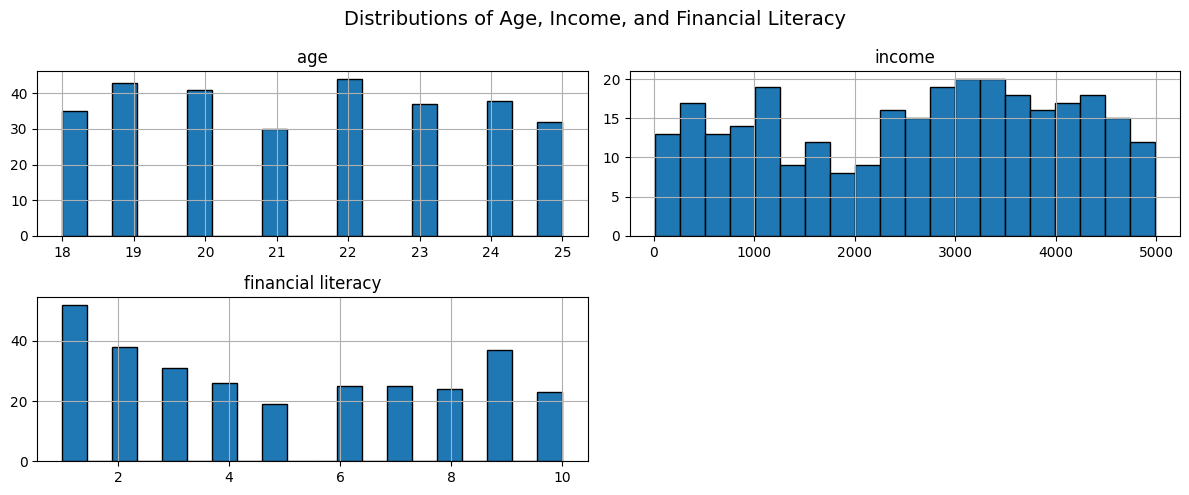

In [ ]:
#Histograms showing how age, income, and financial literacy scores are distributed
FinancialLiteracyNational[['age', 'income', 'financial literacy']].hist(bins=20, figsize=(12, 5), edgecolor='black')
plt.suptitle('Distributions of Age, Income, and Financial Literacy', fontsize=14)
plt.tight_layout()
plt.show()

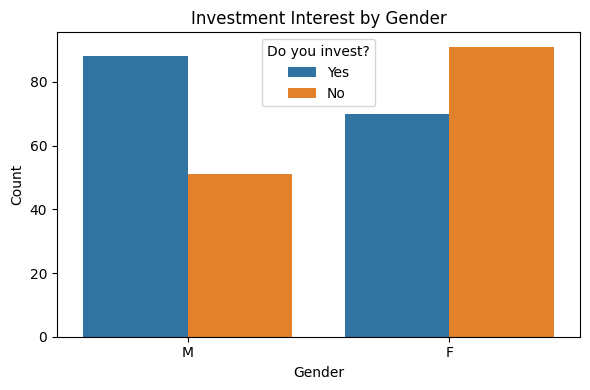

In [ ]:
#Bar chart that comparing how many males vs. females invest
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='do you invest', data=FinancialLiteracyNational)
plt.title("Investment Interest by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.legend(title="Do you invest?")
plt.tight_layout()
plt.show()

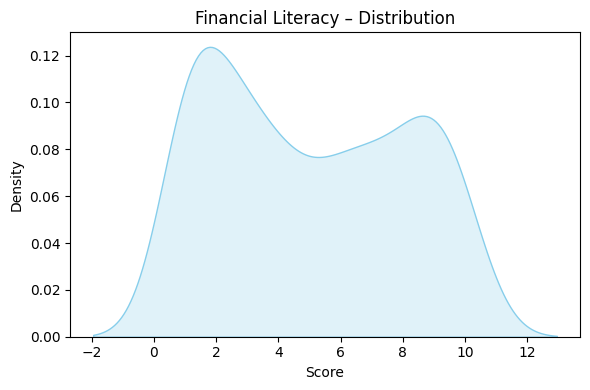

In [ ]:
# 1. KDE Plot – Financial Literacy Distribution
plt.figure(figsize=(6, 4))
sns.kdeplot(FinancialLiteracyNational['financial literacy'], fill=True, color='skyblue')
plt.title("Financial Literacy – Distribution")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

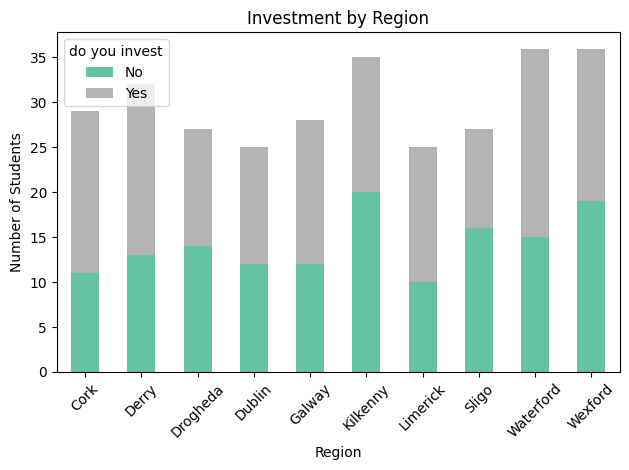

In [ ]:
# 2. Bar Plot – Investment Status by Region
FinancialLiteracyNational.columns = (
    FinancialLiteracyNational.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

# Now create the bar plot using the cleaned column names
plt.figure(figsize=(12, 5))
region_invest = FinancialLiteracyNational.groupby(['irish region', 'do you invest']).size().unstack().fillna(0)
region_invest.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Investment by Region")
plt.ylabel("Number of Students")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Donut chart that shows what percentage of users answered "Yes" or "No" to the "Do you invest?" question.
import plotly.express as px

fig = px.pie(FinancialLiteracyNational,
             names='do you invest',  # Changed column name to match the DataFrame
             title='Investment Participation Among Users',
             hole=0.4)  # makes it a donut chart
fig.show()

In [ ]:
#Donut chart showing the distribution of financial literacy levels
import plotly.express as px

fig = px.pie(FinancialLiteracyNational,
             names='financial literacy',  # Changed column name to match the DataFrame
             title='Financial Literacy Among Users',
             hole=0.4)  # makes it a donut chart
fig.show()


## Sector market trends


In [ ]:
# Assuming 'Date' is a datetime column
FINANCE['date'] = pd.to_datetime(FINANCE['date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'
FINANCE = FINANCE.set_index('date')

# Resample data monthly and calculate the mean close price
FINANCE_resampled = FINANCE['close price'].resample('M').mean() # Corrected column name to 'close price'

# Plot the resampled data
fig = px.line(FINANCE_resampled, title='Finance Stock Price Over Time')
fig.show()

<ipython-input-103-50814a919d6a>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Assuming 'Date' is a datetime column
HEALTHCARE['date'] = pd.to_datetime(HEALTHCARE['date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y'
HEALTHCARE = HEALTHCARE.set_index('date')

# Resample data monthly and calculate the mean close price
HEALTHCARE_resampled = HEALTHCARE['close price'].resample('M').mean() # Corrected column name to 'close price'

# Plot the resampled data
fig = px.line(HEALTHCARE_resampled, title='Healthcare Stock Price Over Time')
fig.show()

<ipython-input-104-0b10a2d9088a>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Assuming 'Date' is a datetime column
TECH['date'] = pd.to_datetime(TECH['date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y' and column name to 'date'
TECH = TECH.set_index('date') #This line may also cause an error so changed 'Date' to 'date'

# Resample data monthly and calculate the mean close price
TECH_resampled = TECH['close price'].resample('M').mean() # Corrected column name to 'close price'

# Plot the resampled data
fig = px.line(TECH_resampled, title='Tech Stock Price Over Time')
fig.show()

<ipython-input-105-98e54de76896>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Assuming 'Date' is a datetime column
CONSUMERDISCRETIONARY['date'] = pd.to_datetime(CONSUMERDISCRETIONARY['date'], format='%d/%m/%Y') # Changed format to '%d/%m/%Y' and column name to 'date'
CONSUMERDISCRETIONARY = CONSUMERDISCRETIONARY.set_index('date') #This line may also cause an error so changed 'Date' to 'date'

# Resample data monthly and calculate the mean close price
CONSUMERDISCRETIONARY_resampled = CONSUMERDISCRETIONARY['close price'].resample('M').mean() # Corrected column name to 'close price'

# Plot the resampled data
fig = px.line(CONSUMERDISCRETIONARY_resampled, title='Consumer Discretionary Stock Price Over Time')
fig.show()

<ipython-input-106-a7ea34c931a1>:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Clean column names
AI.columns = (
    AI.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

# Fix date format
AI['date'] = pd.to_datetime(AI['date'], errors='coerce')

# Create line chart
fig = px.line(
    AI,
    x='date',
    y='close price',
    color='company name',
    title='AI Stock Prices Over Time'
)

# Improve x-axis readability
fig.update_layout(xaxis=dict(tickformat="%Y-%m", tickangle=45))

fig.show()

<ipython-input-107-99c0b9cc6840>:10: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
# Compare how different communication company stock prices have moved over time

COMMUNICATIONS.columns = (
    COMMUNICATIONS.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

fig = px.line(
    COMMUNICATIONS,
    x='date',
    y='close price',
    color='company',
    title='Communication Stock Prices Over Time'
)

fig.show()


# Regression


In [ ]:
print(FinancialLiteracyNational)

     age gender irish region   income  financial literacy risk aversion  \
0     19      M     Drogheda  3936.88                   9   Risk Loving   
1     19      M        Sligo  2162.10                   9  Risk Neutral   
2     25      M    Waterford  4380.18                   6   Risk Averse   
3     20      F        Sligo  2642.94                   2   Risk Averse   
4     19      F    Waterford  2635.13                   4  Risk Neutral   
..   ...    ...          ...      ...                 ...           ...   
295   22      F        Derry  4324.63                   1  Risk Neutral   
296   20      M       Galway  2365.74                   2  Risk Neutral   
297   21      F        Sligo   923.09                   1  Risk Neutral   
298   21      F    Waterford  4037.02                   7  Risk Neutral   
299   22      F     Limerick  4762.41                   1   Risk Loving   

    do you invest what sectors would you invest in  
0             Yes                       health

In [ ]:
import statsmodels.api as sm

In [ ]:
gender_mapping = {'M': 0, 'F': 1}
FinancialLiteracyNational['gender'] = FinancialLiteracyNational['gender'].map(gender_mapping)

In [ ]:
risk_mapping = {'Risk Loving': 0, 'Risk Neutral': 1, 'Risk Averse': 2}
FinancialLiteracyNational['risk aversion'] = FinancialLiteracyNational['risk aversion'].map(risk_mapping)

In [ ]:
investment_mapping = {'Yes': 1, 'No': 0}
FinancialLiteracyNational['do you invest'] = FinancialLiteracyNational['do you invest'].map(investment_mapping)

In [ ]:
print(FinancialLiteracyNational)

     age  gender irish region   income  financial literacy  risk aversion  \
0     19       0     Drogheda  3936.88                   9              0   
1     19       0        Sligo  2162.10                   9              1   
2     25       0    Waterford  4380.18                   6              2   
3     20       1        Sligo  2642.94                   2              2   
4     19       1    Waterford  2635.13                   4              1   
..   ...     ...          ...      ...                 ...            ...   
295   22       1        Derry  4324.63                   1              1   
296   20       0       Galway  2365.74                   2              1   
297   21       1        Sligo   923.09                   1              1   
298   21       1    Waterford  4037.02                   7              1   
299   22       1     Limerick  4762.41                   1              0   

     do you invest what sectors would you invest in  
0                1   

In [ ]:
# Use normalized column names
y = FinancialLiteracyNational['financial literacy']
X = FinancialLiteracyNational['age']
X = sm.add_constant(X)

# Fit and print model
model_single = sm.OLS(y, X).fit()
print(model_single.summary())


                            OLS Regression Results                            
Dep. Variable:     financial literacy   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     7.594
Date:                Thu, 10 Apr 2025   Prob (F-statistic):            0.00622
Time:                        10:21:35   Log-Likelihood:                -758.65
No. Observations:                 300   AIC:                             1521.
Df Residuals:                     298   BIC:                             1529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3886      1.683      0.231      0.8

In [ ]:
y = FinancialLiteracyNational['financial literacy']
X = FinancialLiteracyNational['gender']
X = sm.add_constant(X)

model_single = sm.OLS(y, X).fit()
print(model_single.summary())


                            OLS Regression Results                            
Dep. Variable:     financial literacy   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     68.75
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           3.88e-15
Time:                        10:21:37   Log-Likelihood:                -731.29
No. Observations:                 300   AIC:                             1467.
Df Residuals:                     298   BIC:                             1474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4317      0.236     27.288      0.0

In [ ]:
y = FinancialLiteracyNational['financial literacy']
X = FinancialLiteracyNational['do you invest']
X = sm.add_constant(X)

model_single = sm.OLS(y, X).fit()
print(model_single.summary())


                            OLS Regression Results                            
Dep. Variable:     financial literacy   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.705
Date:                Thu, 10 Apr 2025   Prob (F-statistic):             0.0552
Time:                        10:21:39   Log-Likelihood:                -760.57
No. Observations:                 300   AIC:                             1525.
Df Residuals:                     298   BIC:                             1533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.6408      0.257     18.050

In [ ]:
print(FinancialLiteracyNational[['financial literacy', 'gender', 'age', 'risk aversion', 'do you invest']].isna().sum())


financial literacy    0
gender                0
age                   0
risk aversion         0
do you invest         0
dtype: int64


In [ ]:
# # Target variable
y = FinancialLiteracyNational['financial literacy']

# # Predictor variables with normalized names
X = FinancialLiteracyNational[['gender', 'age', 'risk aversion', 'do you invest']]
X = sm.add_constant(X)

# # Fit and summarize model
model_mult = sm.OLS(y, X).fit()
print(model_mult.summary())


                            OLS Regression Results                            
Dep. Variable:     financial literacy   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     20.62
Date:                Thu, 10 Apr 2025   Prob (F-statistic):           5.36e-15
Time:                        10:21:42   Log-Likelihood:                -725.45
No. Observations:                 300   AIC:                             1461.
Df Residuals:                     295   BIC:                             1479.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2208      1.540      0.793

In [ ]:
print(STOCKPRICES)

       Company Name        Date  Open Price  High Price   Low Price  \
0            Nvidia  22/01/1999    0.043750    0.048828    0.038802   
1            Nvidia  25/01/1999    0.044271    0.045833    0.041016   
2            Nvidia  26/01/1999    0.045833    0.046745    0.041146   
3            Nvidia  27/01/1999    0.041927    0.042969    0.039583   
4            Nvidia  28/01/1999    0.041667    0.041927    0.041276   
..              ...         ...         ...         ...         ...   
995  Walt Disney Co  28/11/2024  424.000000  307.000000  443.000000   
996          Amazon  17/12/2024  246.000000  144.000000  493.000000   
997          CostCo  17/12/2024  108.000000  366.000000  343.000000   
998          CostCo  19/12/2024  279.000000  302.000000  443.000000   
999            Visa  30/12/2024  363.000000  211.000000  288.000000   

     Close Price        Volume  Adjusted                  Sector  Adjclose  \
0       0.041016  2.714688e+09  0.037621                      AI     

In [ ]:
cols_to_drop = [col for col in STOCKPRICES.columns if col.strip().lower() in ['symbol', 'adjclose']]
STOCKPRICES.drop(columns=cols_to_drop, inplace=True)


In [ ]:
cols_to_drop = [col for col in STOCKPRICES.columns if 'adjusted' in col.lower()]
STOCKPRICES.drop(columns=cols_to_drop, inplace=True)


In [ ]:
print(STOCKPRICES)

       Company Name        Date  Open Price  High Price   Low Price  \
0            Nvidia  22/01/1999    0.043750    0.048828    0.038802   
1            Nvidia  25/01/1999    0.044271    0.045833    0.041016   
2            Nvidia  26/01/1999    0.045833    0.046745    0.041146   
3            Nvidia  27/01/1999    0.041927    0.042969    0.039583   
4            Nvidia  28/01/1999    0.041667    0.041927    0.041276   
..              ...         ...         ...         ...         ...   
995  Walt Disney Co  28/11/2024  424.000000  307.000000  443.000000   
996          Amazon  17/12/2024  246.000000  144.000000  493.000000   
997          CostCo  17/12/2024  108.000000  366.000000  343.000000   
998          CostCo  19/12/2024  279.000000  302.000000  443.000000   
999            Visa  30/12/2024  363.000000  211.000000  288.000000   

     Close Price        Volume  Adjusted                  Sector  
0       0.041016  2.714688e+09  0.037621                      AI  
1       0.045

In [ ]:
y = STOCKPRICES['Close Price']
X = STOCKPRICES[['High Price','Low Price','Open Price','Volume']]
X = sm.add_constant(X)
model_mult = sm.OLS(y, X).fit()
print(model_mult.summary())

                            OLS Regression Results                            
Dep. Variable:            Close Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 1.182e+05
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:21:53   Log-Likelihood:            -3.2275e+05
No. Observations:               64025   AIC:                         6.455e+05
Df Residuals:                   64020   BIC:                         6.455e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6682      0.197     13.543      0.0

# Forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Load the CSV
nvda_df = pd.read_csv("Econometrics & Forecasting - Ayaka AI.csv")

# Prepare the data
nvda_df["Date"] = pd.to_datetime(nvda_df["Date"])
nvda_df.set_index("Date", inplace=True)
nvda_df = nvda_df[["Adjusted"]].dropna()

# Use the most recent 200 rows
nvda_recent = nvda_df[-200:]
nvda_recent = nvda_recent[~nvda_recent.index.duplicated(keep='first')]

# Optional: Visual check
nvda_recent.tail()


,Adjusted
Date,
2024-04-24,19485700.0
2024-04-25,36197800.0
2024-04-26,56500800.0
2024-04-29,35914600.0
2024-04-30,29420800.0


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

                               SARIMAX Results                                
Dep. Variable:               Adjusted   No. Observations:                  200
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3458.691
Date:                Thu, 10 Apr 2025   AIC                           6925.381
Time:                        10:22:00   BIC                           6938.575
Sample:                             0   HQIC                          6930.721
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.242e+07   8.17e+05     27.429      0.000    2.08e+07     2.4e+07
ma.L1          0.3270      0.060      5.469      0.000       0.210       0.444
ma.L2          0.1711      0.058      2.946      0.0

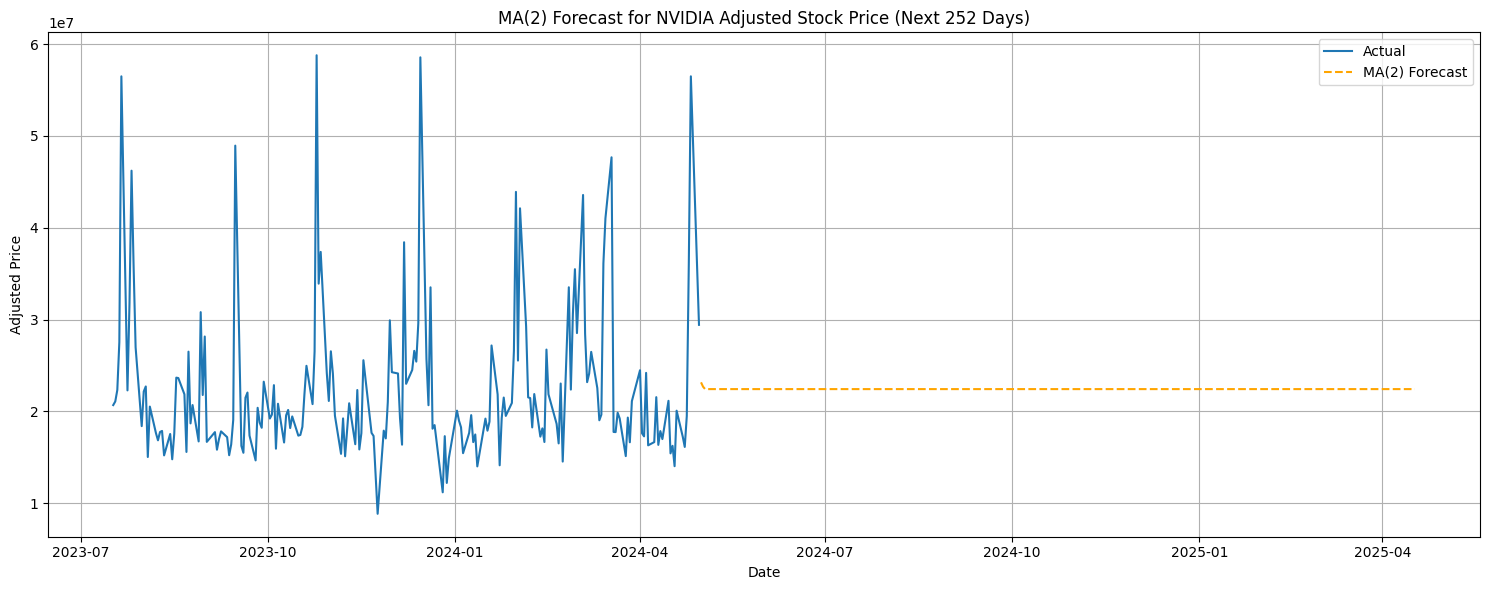

In [ ]:
# The MA(2) forecast appears flat because moving average models rely on past error terms, not past values.
# Once the forecast period starts, the model assumes future errors are zero, leading to a flat forecast line.
# This makes MA models less effective for forecasting trending data like stock prices.
# They are better used for modeling noise or residuals in stationary series.
# For upward-trending assets like stocks, AR or ARMA models are generally more suitable.

# Make sure nvda_recent exists and has 'Adjusted' and datetime index
# Example: nvda_recent = STOCKPRICES[STOCKPRICES['company'] == 'NVIDIA'].set_index('date')

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Forecast next 252 business days (approx. 1 year)
forecast_steps = 252

# Fit MA(2) model
ma_model = ARIMA(nvda_recent['Adjusted'], order=(0, 0, 2))  # AR=0, I=0, MA=2
ma_result = ma_model.fit()

# Summary
print(ma_result.summary())

# Forecast
ma_forecast = ma_result.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(nvda_recent.index, nvda_recent["Adjusted"], label="Actual")
plt.plot(pd.date_range(nvda_recent.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="B"),
         ma_forecast, label="MA(2) Forecast", linestyle="--", color="orange")
plt.title("MA(2) Forecast for NVIDIA Adjusted Stock Price (Next 252 Days)")
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:               Adjusted   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -3455.345
Date:                Thu, 10 Apr 2025   AIC                           6918.691
Time:                        10:22:06   BIC                           6931.884
Sample:                             0   HQIC                          6924.030
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.242e+07    1.2e+06     18.723      0.000    2.01e+07    2.48e+07
ar.L1          0.3483      0.064      5.414      0.000       0.222       0.474
ar.L2          0.1267      0.074      1.701      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



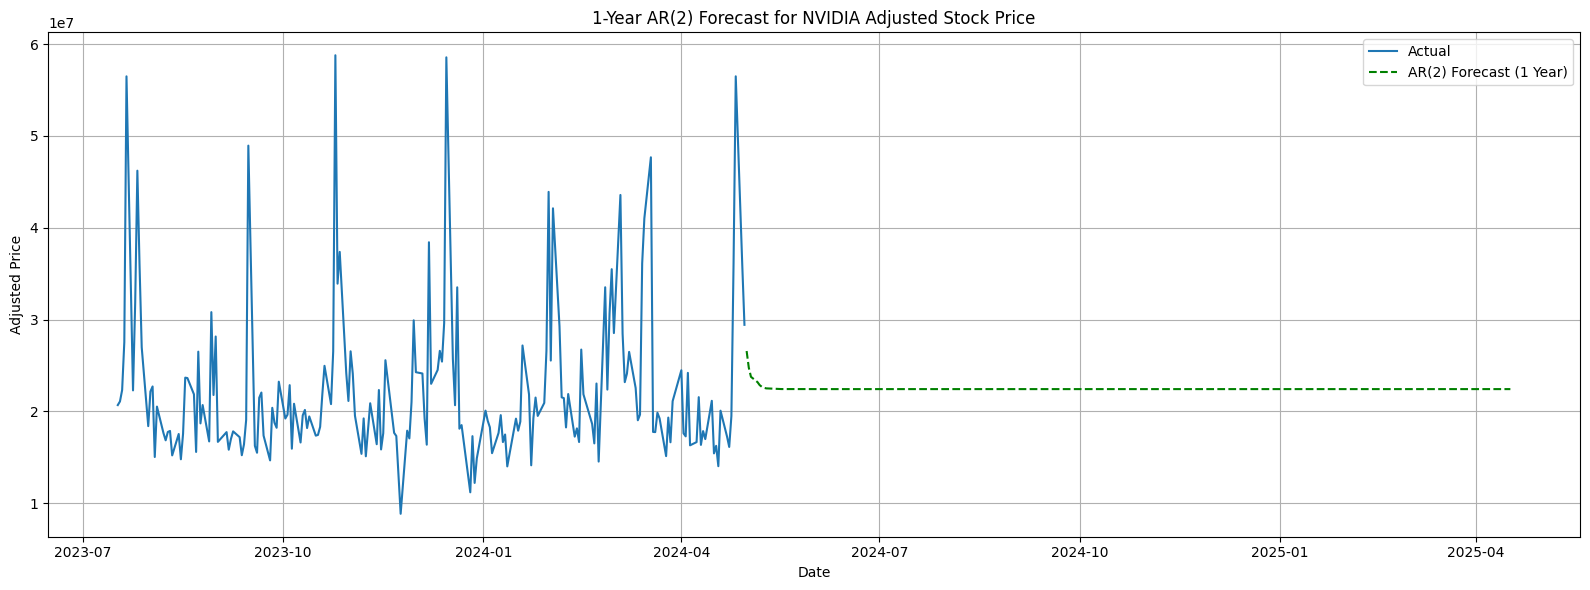

In [ ]:
# Why the AR(2) forecast looks flat:
# Autoregressive models (like AR(2)) rely only on past values, so after the recent trend ends,
# the model expects stability or gradual return to recent levels based on lag structure.
# AR(2) does not account for growth trends or seasonality — it’s purely driven by lagged values.
# This flat behavior is typical, especially when no differencing (d=0) or exogenous variables are used.

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Fit AR(2) model to NVIDIA adjusted prices
ar_model = ARIMA(nvda_recent['Adjusted'], order=(2, 0, 0))
ar_result = ar_model.fit()

# Print model summary
print(ar_result.summary())

# Forecast 1 year ahead (~252 business days)
forecast_steps = 252
ar_forecast = ar_result.forecast(steps=forecast_steps)

# Build future date index (excluding current last date)
future_dates = pd.date_range(start=nvda_recent.index[-1], periods=forecast_steps + 1, freq='B')[1:]

# Plot actual + forecast
plt.figure(figsize=(16, 6))
plt.plot(nvda_recent.index, nvda_recent['Adjusted'], label="Actual")
plt.plot(future_dates, ar_forecast, label="AR(2) Forecast (1 Year)", linestyle="--", color="green")
plt.title("1-Year AR(2) Forecast for NVIDIA Adjusted Stock Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:               Adjusted   No. Observations:                  200
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -3455.544
Date:                Thu, 10 Apr 2025   AIC                           6923.087
Time:                        10:22:16   BIC                           6942.877
Sample:                             0   HQIC                          6931.096
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.242e+07   1.78e-07   1.26e+14      0.000    2.24e+07    2.24e+07
ar.L1         -0.1971      0.553     -0.357      0.721      -1.280       0.886
ar.L2          0.5870      0.341      1.722      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



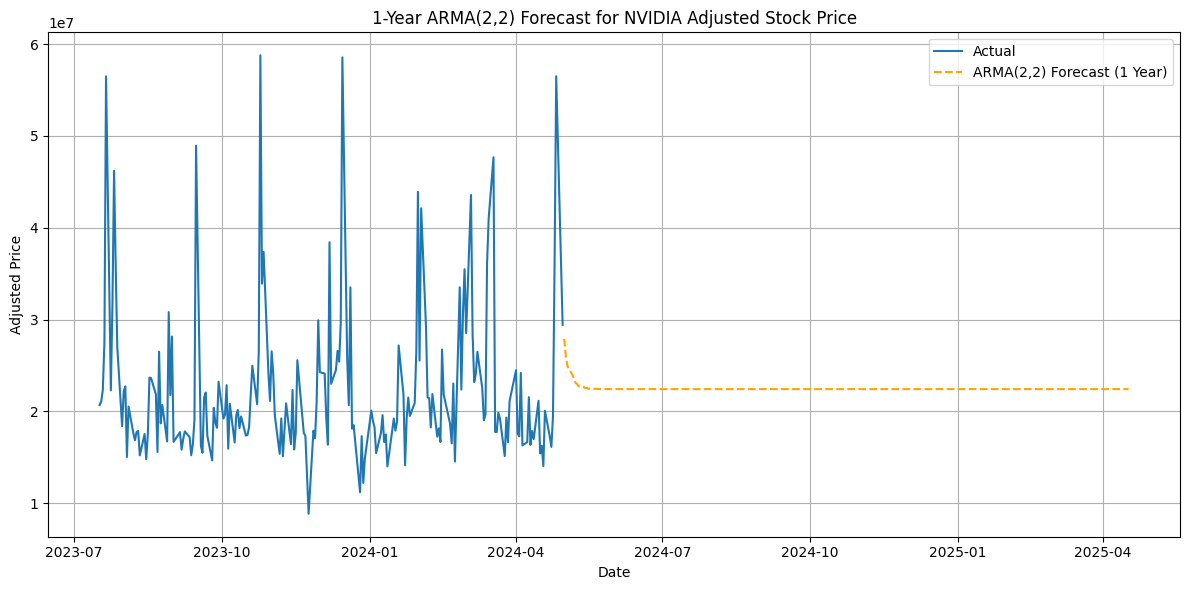

In [ ]:
# Why ARMA(2,2) forecast so linear:

# No differencing (d=0): The model assumes the data is stationary (no trend), so it doesn't learn long-term upward/downward movement.

# Short forecast horizon (1 year): The model projects based on recent momentum and often "flattens out" when uncertainty increases.

# No seasonality modeled: ARMA doesn’t account for cycles or repeating patterns, so the result is smoother.

# Low recent volatility: If the last part of your actual data was steady or trending slowly, the model just extends that.

# Model simplicity: ARMA(2,2) only looks at recent lags (2 AR, 2 MA terms), so it’s limited in complexity and often outputs a basic trend.



# Fit ARMA(2,2) model on nvda_recent
arma_model = ARIMA(nvda_recent, order=(2, 0, 2))  # AR=2, I=0, MA=2
arma_result = arma_model.fit()

# Summary
print(arma_result.summary())

# Forecasting the next 252 business days (~1 year)
arma_forecast = arma_result.forecast(steps=252)

# Plot actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(nvda_recent.index, nvda_recent["Adjusted"], label="Actual")
plt.plot(pd.date_range(nvda_recent.index[-1], periods=253, freq="B")[1:], arma_forecast,
         label="ARMA(2,2) Forecast (1 Year)", linestyle="--", color="orange")

plt.title("1-Year ARMA(2,2) Forecast for NVIDIA Adjusted Stock Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
